In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()
data = pd.read_csv('H3.txt', sep = '\n')
print(data.head())

Saving H3.txt to H3.txt
                                            all_data
0                                     >iTELL-Chr1_61
1  CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...
2                                                  0
3                                   >iYAL067W-A_5085
4  AATTTTTATAGGTCGACCCTTCTGTCGCTTACTGGGTTGATTATCT...


In [4]:
all=data["all_data"].tolist()
cls=[]
sequence=[]
label=[]

In [5]:
length = len(all)
for i in range(length):
   if (i%3)==0:
             cls.append(all[i])
   else:
      if(all[i]== "0" or all[i]=="1"):
        label.append(all[i])
      else:
         sequence.append(all[i])

print(len(cls))
print(len(label))
print(len(sequence))

14965
14965
14965


In [6]:
df = pd.DataFrame(list(zip(cls, label, sequence)),
               columns =['class' , 'label', 'sequence'])
df.head(10)

,class,label,sequence
0,>iTELL-Chr1_61,0,CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...
1,>iYAL067W-A_5085,0,AATTTTTATAGGTCGACCCTTCTGTCGCTTACTGGGTTGATTATCT...
2,>iYAL067W-A_6786,0,AATTATATTTCCATCAGCTCAATACCGCAGTACTTTGAAACCTGAT...
3,>iYAL067W-A_7060,0,AACAATAGTGGGTATGAGTAAAGATATATAGATCGATATTTTGAAT...
4,>YAL067C_SEO1_8061,1,CAAAGATTTCAACCATAGTAGGTATGCCCCAGATGAAACATTACTG...
5,>YAL067C_SEO1_8340,1,CACAATAGCGTCAATAATAAAGTTCCATCTCCATCCCTCTAAACCA...
6,>iYAL067C_9509,1,GTTTTTTTCCAGTGACACAATCTTTACCATTACACAGTTTTTACTA...
7,>iYAL067C_10442,0,CAGAAACATAAAATTATATCACTTTATTTCATATGGTTTCATGCTT...
8,>YAL065C_YAL065C_11570,1,AGATACCTCGAAACAAACTCTATGTAAACACTTATTTTATTGTGGT...
9,>iYAL064W-B_13286,1,ATGACTGGAGAAGAAGTGACTAGAGAAGAAGTGACTGAGGAAGAAA...


In [7]:

sequences=df['sequence']
sequences


0        CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...
1        AATTTTTATAGGTCGACCCTTCTGTCGCTTACTGGGTTGATTATCT...
2        AATTATATTTCCATCAGCTCAATACCGCAGTACTTTGAAACCTGAT...
3        AACAATAGTGGGTATGAGTAAAGATATATAGATCGATATTTTGAAT...
4        CAAAGATTTCAACCATAGTAGGTATGCCCCAGATGAAACATTACTG...
                               ...                        
14960    TCATAATTACAAAATACCCTGTGATTAGGATATCATTATTACTAAC...
14961    ATATGTTTACAACAAAGTTATAAAAAGTTTTCTCAAACCTTTTCCA...
14962    ATTATATTTAATTTAATAAGAAAAGAAACGAAAAAAAAAAAAAAAA...
14963    TATAAATGAATGCTCTCGTTGTAATTCAAGAGAACCCAACCAACAA...
14964    TTGATGTTGCCATTTACTATAATTCTCTCCATAATCATTGCAGTAA...
Name: sequence, Length: 14965, dtype: object

In [8]:
max_len = 502
for seq in sequences:
        length = len(seq)
        if length >max_len:
           max_len=length




In [9]:
padded_seqs = []

for seq in sequence:
        gap=" "
        gap=[0] * (max_len - len(seq))
        gap= ''.join(map(str, gap))
        gap=seq+gap;
        padded_seqs.append(gap)

In [10]:
len(padded_seqs[2])

502

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

integer_encoder = LabelEncoder()  
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in padded_seqs:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 CACACCACAC ... GTTCTTCTAC
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
input_features

array([[[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       ...,

       [[0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]],

       [[0.,

In [13]:
labels=df['label']
labels

0        0
1        0
2        0
3        0
4        1
        ..
14960    0
14961    1
14962    1
14963    1
14964    1
Name: label, Length: 14965, dtype: object

In [14]:
one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)


Labels:
 [['0' '0' '0' ... '1' '1' '1']]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [15]:
input_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [16]:
import numpy as np
input_features=np.asarray(input_features)
input_labels=np.asarray(input_labels)


In [17]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.25, random_state=42)

In [18]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(train_features.shape[1], 5)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['binary_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 491, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 122, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3904)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                62480     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 64,466
Trainable params: 64,466
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
264/264 - 4s - loss: 0.0043 - binary_accuracy: 0.9989 - val_loss: 0.9264 - val_binary_accuracy: 0.7880
Epoch 2/10
264/264 - 4s - loss: 0.0035 - binary_accuracy: 0.9996 - val_loss: 0.9749 - val_binary_accuracy: 0.7912
Epoch 3/10
264/264 - 4s - loss: 0.0030 - binary_accuracy: 0.9994 - val_loss: 0.9860 - val_binary_accuracy: 0.7880
Epoch 4/10
264/264 - 4s - loss: 0.0026 - binary_accuracy: 0.9999 - val_loss: 1.0139 - val_binary_accuracy: 0.7869
Epoch 5/10
264/264 - 4s - loss: 0.0024 - binary_accuracy: 0.9995 - val_loss: 1.0418 - val_binary_accuracy: 0.7894
Epoch 6/10
264/264 - 4s - loss: 0.0021 - binary_accuracy: 0.9998 - val_loss: 1.0713 - val_binary_accuracy: 0.7890
Epoch 7/10
264/264 - 4s - loss: 0.0018 - binary_accuracy: 0.9999 - val_loss: 1.1088 - val_binary_accuracy: 0.7890
Epoch 8/10
264/264 - 4s - loss: 0.0016 - binary_accuracy: 0.9999 - val_loss: 1.1088 - val_binary_accuracy: 0.7865
Epoch 9/10
264/264 - 4s - loss: 0.0015 - binary_accuracy: 0.9999 - val_loss: 1.1536 - va

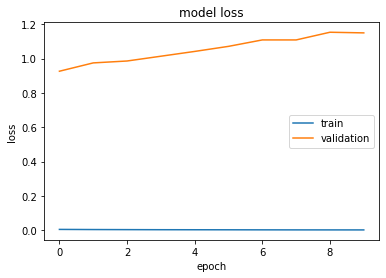

In [20]:
history = model.fit(train_features, train_labels, 
                    epochs=10, verbose=2, validation_split=0.25)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

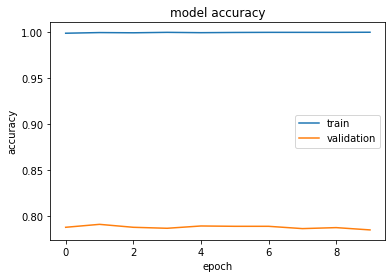

In [21]:
plt.figure()
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

Confusion matrix:
 [[1408  418]
 [ 365 1551]]


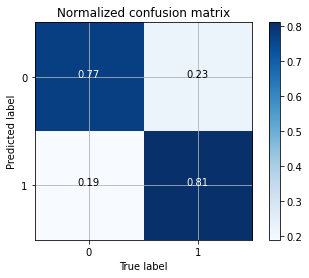

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

predicted_labels = model.predict(np.stack(test_features))
cm = confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')